<a href="https://colab.research.google.com/github/patanshahidkhan1/Singapore-GES-Exploratory-Data-Analysis/blob/main/Singapore_GES_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 🧾 Project Overview

This project performs Exploratory Data Analysis (EDA) on Singapore’s Graduate Employment Survey (GES) dataset.
The dataset provides detailed insights into graduate employability and salary outcomes across different universities, schools, and degree programs in Singapore over several years.



In [ ]:
import pandas as pd
import numpy as np

# ---------- 1. Load the dataset ----------
df = pd.read_csv("dataset.csv")


# ---------- 2. Basic Info ----------
print("Before Cleaning:")
print(df.info())
print("\nNull Values Before Cleaning:\n", df.isnull().sum())

# ---------- 3. Strip whitespace from column names ----------
df.columns = df.columns.str.strip()

# ---------- 4. Replace missing or empty strings with NaN ----------
df.replace(["-", "N/A", "na", "NA", "n.a.", ""], np.nan, inplace=True)

# ---------- 5. Convert numeric columns to proper float dtype ----------
numeric_cols = [
    "employment_rate_overall",
    "employment_rate_ft_perm",
    "basic_monthly_mean",
    "basic_monthly_median",
    "gross_monthly_mean",
    "gross_monthly_median",
    "gross_mthly_25_percentile",
    "gross_mthly_75_percentile"
]

# Remove commas or percentage symbols and convert to numeric
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(",", "", regex=True)
    df[col] = df[col].astype(str).str.replace("%", "", regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ---------- 6. Check null values again ----------
print("\nNull Values After Cleaning:\n", df.isnull().sum())

# ---------- 7. Fill or drop missing values ----------
# Option A: Fill numeric NaNs with column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Option B: Or drop rows with too many missing values
# df.dropna(subset=numeric_cols, inplace=True)

# ---------- 8. Verify data types ----------
print("\nAfter Cleaning:")
print(df.dtypes)

# ---------- 9. Save the clean dataset ----------
df.to_csv("cleaned_dataset.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_dataset.csv'")

# ---------- 10. Optional: Quick Preview ----------
print("\nSample Cleaned Data:\n", df.head())


Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       1401 non-null   int64 
 1   university                 1401 non-null   object
 2   school                     1401 non-null   object
 3   degree                     1401 non-null   object
 4   employment_rate_overall    1401 non-null   object
 5   employment_rate_ft_perm    1401 non-null   object
 6   basic_monthly_mean         1401 non-null   object
 7   basic_monthly_median       1401 non-null   object
 8   gross_monthly_mean         1401 non-null   object
 9   gross_monthly_median       1401 non-null   object
 10  gross_mthly_25_percentile  1401 non-null   object
 11  gross_mthly_75_percentile  1401 non-null   object
dtypes: int64(1), object(11)
memory usage: 131.5+ KB
None

Null Values Before Cleaning:
 year             

In [ ]:
import os
print(os.listdir())


['.config', 'dataset.csv', 'drive', 'cleaned_dataset.csv', 'sample_data']


#  1️ Bar Plot – Overall Employment Rate by University

Purpose:
To compare the average overall employment rates of graduates across different universities.

Insights:

Highlights which universities have the highest employability among graduates.

Shows how institutions differ in job placement performance.

Helps identify top-performing universities in terms of employment outcomes.

/tmp/ipython-input-3527273697.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emp_data.values, y=wrapped_labels, palette="Greens_r")


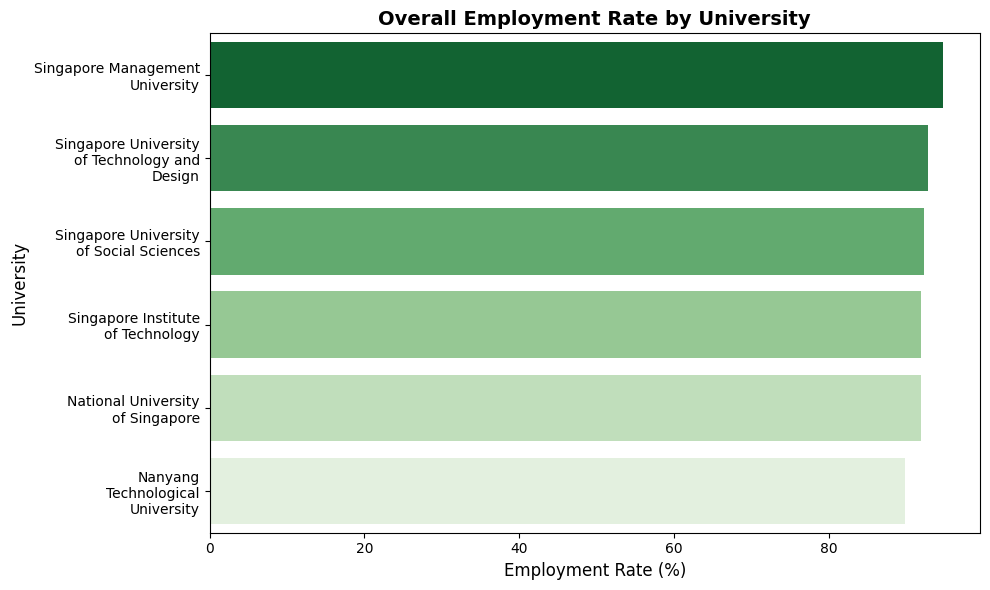

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

df["employment_rate_overall"] = (
    df["employment_rate_overall"]
    .replace(r'%', '', regex=True)
    .astype(float)
)

# Group by university and calculate average employment rate
emp_data = (
    df.groupby("university")["employment_rate_overall"]
    .mean()
    .sort_values(ascending=False)
)

# Wrap long university names
wrapped_labels = [textwrap.fill(label, 20) for label in emp_data.index]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=emp_data.values, y=wrapped_labels, palette="Greens_r")

# Titles and labels
plt.title("Overall Employment Rate by University", fontsize=14, fontweight='bold')
plt.xlabel("Employment Rate (%)", fontsize=12)
plt.ylabel("University", fontsize=12)
plt.tight_layout()
plt.show()


#  2️ Pie Chart – Share of Employment Rate by University

Purpose:
To visualize each university’s proportionate share in total employment outcomes.

Insights:

Displays the relative contribution of each university to overall employment.

Useful for understanding distribution dominance — which universities have a larger share of the employed graduate pool.

Gives a clear snapshot of employment market balance across universities.

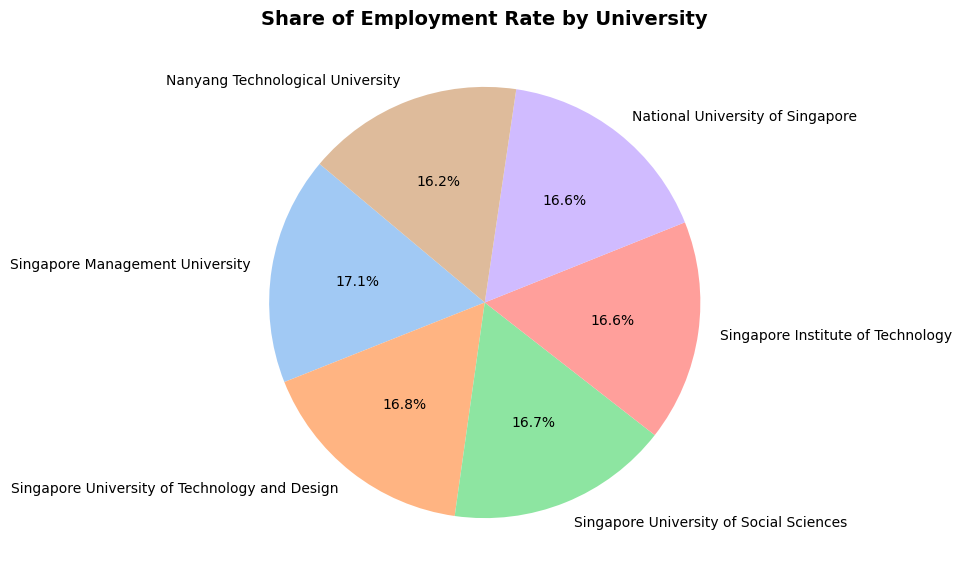

In [ ]:
emp_share = df.groupby("university")["employment_rate_overall"].mean().sort_values(ascending=False)

plt.figure(figsize=(7,7))
plt.pie(emp_share.values, labels=emp_share.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Share of Employment Rate by University", fontsize=14, fontweight='bold')
plt.show()


#  3️ Box Plot – Distribution of Gross Monthly Salary by University

Purpose:
To analyze the spread, variation, and outliers in graduate salaries across universities.

Insights:

Shows how salary ranges differ between institutions.

Identifies outliers or highly paid graduates within each university.

Helps assess consistency and dispersion in salary distributions.

/tmp/ipython-input-3905325305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gross_monthly_mean", y="university", data=df, palette="coolwarm")


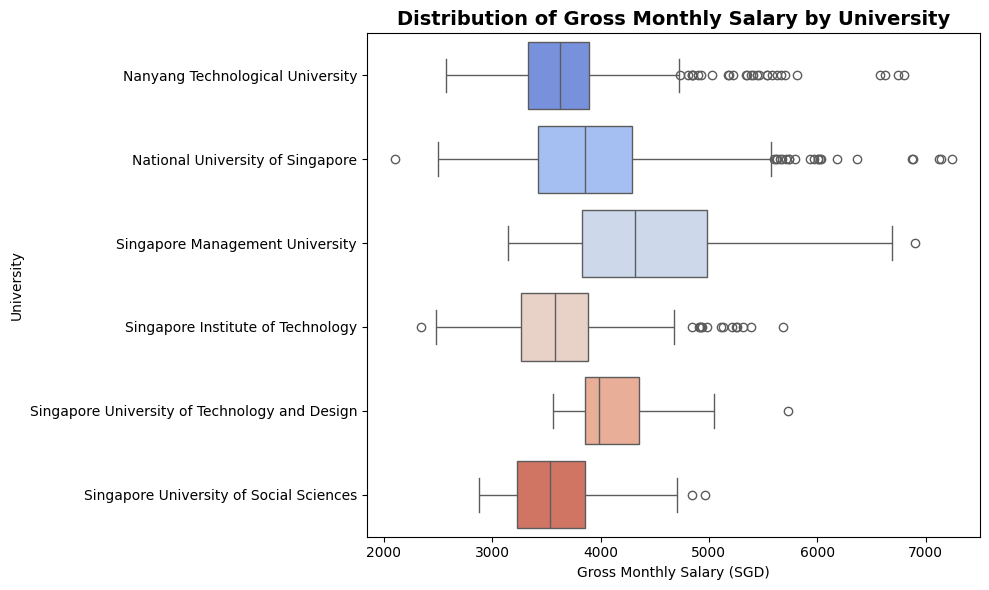

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="gross_monthly_mean", y="university", data=df, palette="coolwarm")
plt.title("Distribution of Gross Monthly Salary by University", fontsize=14, fontweight='bold')
plt.xlabel("Gross Monthly Salary (SGD)")
plt.ylabel("University")
plt.tight_layout()
plt.show()


#  4️ Line / Area Plot – Yearly Trend of Average Gross Monthly Salary

Purpose:
To track how average graduate salaries change over the years.

Insights:

Reveals growth patterns or dips in salaries over time.

Helps understand the impact of economic trends or policies on graduate pay.

Indicates whether salary levels are steadily increasing or fluctuating.

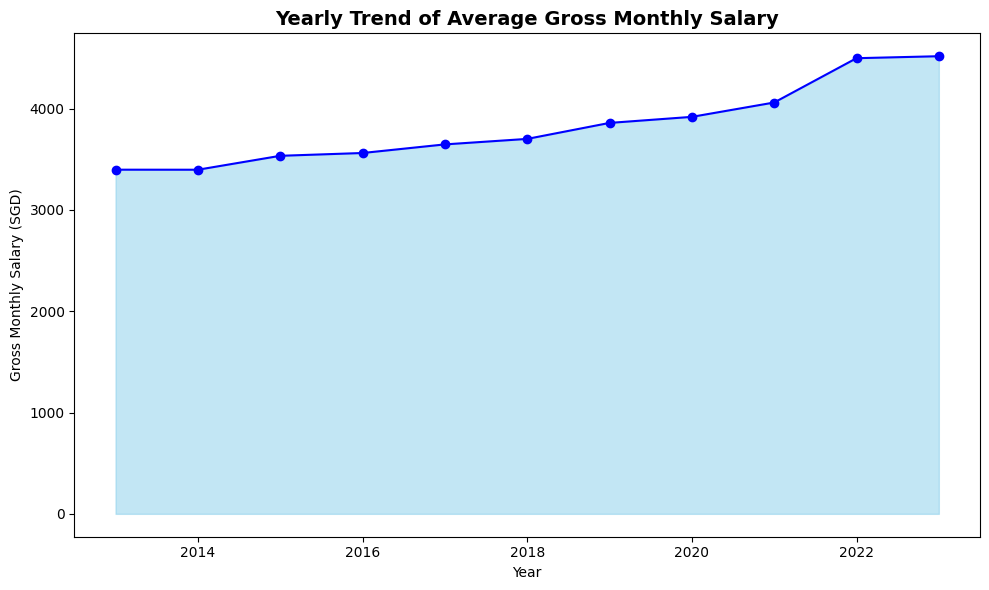

In [ ]:
yearly_salary = df.groupby("year")["gross_monthly_mean"].mean().reset_index()
plt.figure(figsize=(10,6))
plt.fill_between(yearly_salary["year"], yearly_salary["gross_monthly_mean"], color="skyblue", alpha=0.5)
plt.plot(yearly_salary["year"], yearly_salary["gross_monthly_mean"], color="blue", marker="o")
plt.title("Yearly Trend of Average Gross Monthly Salary", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Gross Monthly Salary (SGD)")
plt.tight_layout()
plt.show()


#  5️ Parallel Coordinates Plot – Salary Components by University

Purpose:
To compare multiple salary components (mean, median, 25th and 75th percentiles) across universities in a single view.

Insights:

Highlights differences in salary structure among universities.

Shows how salary consistency (between percentiles) varies per university.

Useful to identify universities with balanced vs skewed salary distributions.

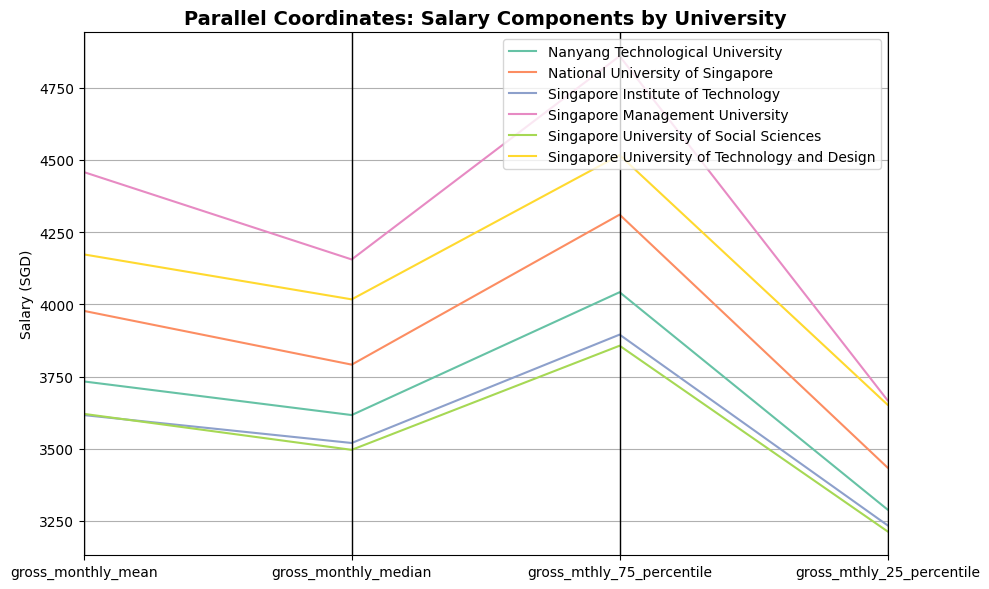

In [ ]:
from pandas.plotting import parallel_coordinates

subset = df[["university", "gross_monthly_mean", "gross_monthly_median", "gross_mthly_75_percentile", "gross_mthly_25_percentile"]]
subset = subset.groupby("university").mean().reset_index()

plt.figure(figsize=(10,6))
parallel_coordinates(subset, "university", color=sns.color_palette("Set2"))
plt.title("Parallel Coordinates: Salary Components by University", fontsize=14, fontweight='bold')
plt.ylabel("Salary (SGD)")
plt.tight_layout()
plt.show()


#  6️ Scatter / Bubble Plot – Salary vs Employment vs Year

Purpose:
To explore the relationship between employment rate and salary, while incorporating year as a third dimension.

Insights:

Reveals correlation between high employment rates and salary levels.

Shows year-wise evolution — bubbles indicate trends across time.

Helps identify whether better employability translates into higher pay.

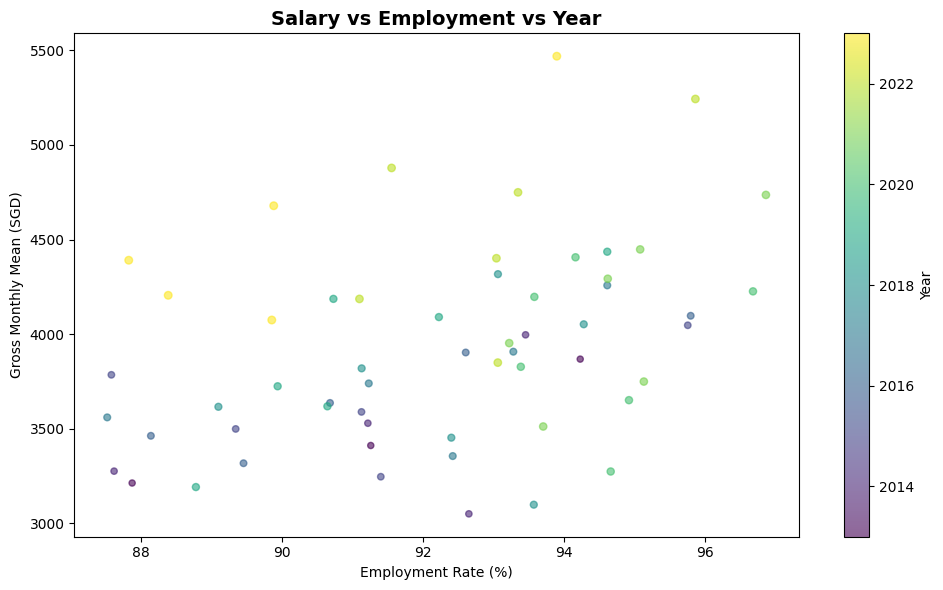

In [ ]:
year_uni = df.groupby(["year", "university"]).agg({
    "gross_monthly_mean": "mean",
    "employment_rate_overall": "mean"
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(
    year_uni["employment_rate_overall"],
    year_uni["gross_monthly_mean"],
    s=year_uni["year"] - year_uni["year"].min() + 20,
    c=year_uni["year"],
    cmap="viridis",
    alpha=0.6
)
plt.title("Salary vs Employment vs Year", fontsize=14, fontweight='bold')
plt.xlabel("Employment Rate (%)")
plt.ylabel("Gross Monthly Mean (SGD)")
plt.colorbar(label="Year")
plt.tight_layout()
plt.show()


#  7️ Horizontal Line Plot – Average Gross Monthly Salary by University

Purpose:
To display the average gross monthly salary across universities in a clean, horizontal format.

Insights:

Makes it easy to compare salary averages between universities.

Highlights which universities offer the highest and lowest average salaries.

Shows the salary hierarchy in a simple, minimal visual form.

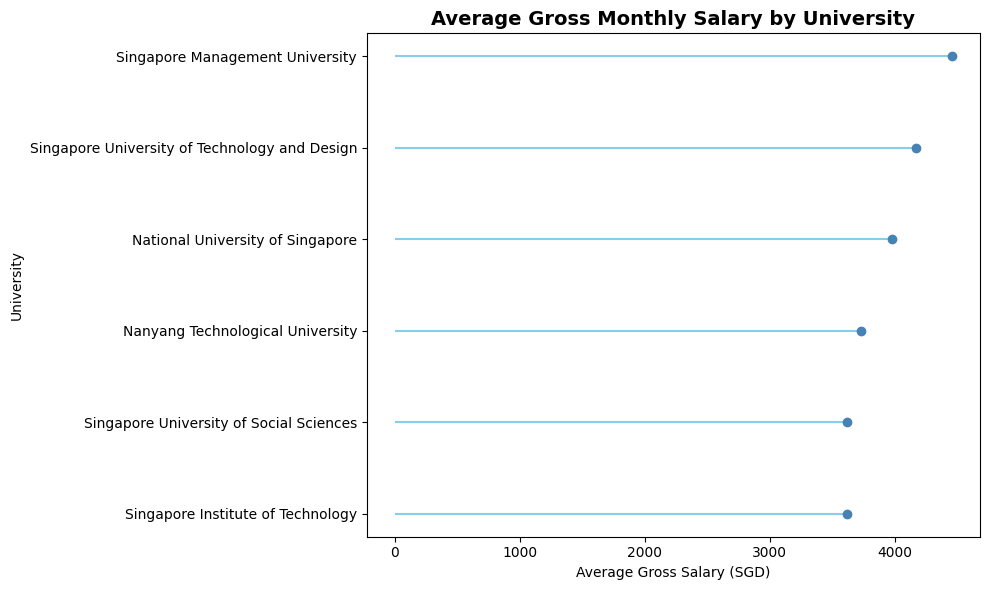

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = df.groupby("university")["gross_monthly_mean"].mean().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.hlines(y=salary_data.index, xmin=0, xmax=salary_data.values, color='skyblue')
plt.plot(salary_data.values, salary_data.index, "o", color='steelblue')
plt.title("Average Gross Monthly Salary by University", fontsize=14, fontweight='bold')
plt.xlabel("Average Gross Salary (SGD)")
plt.ylabel("University")
plt.tight_layout()
plt.show()


#  8️ KDE Plot – Salary Density Distribution by University

Purpose:
To visualize the distribution and concentration of salaries across universities.

Insights:

Shows how salaries are spread (wide or narrow) for each university.

Helps identify universities with consistent vs highly variable salary ranges.

Overlapping curves reveal differences in salary competitiveness between institutions.

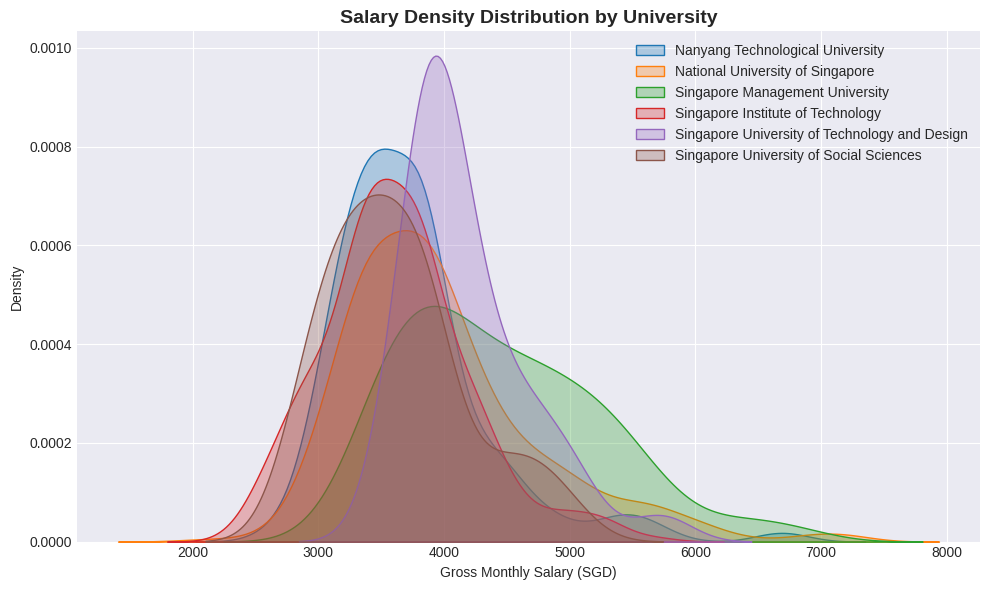

In [ ]:
plt.figure(figsize=(10,6))
for uni in df["university"].unique():
    subset = df[df["university"] == uni]
    sns.kdeplot(subset["gross_monthly_mean"], label=uni, fill=True, alpha=0.3)
plt.title("Salary Density Distribution by University", fontsize=14, fontweight='bold')
plt.xlabel("Gross Monthly Salary (SGD)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


#  9️ Line Plot – Yearly Trend of Employment Rate

Purpose:
To analyze how the overall employment rate has changed year over year.

Insights:

Displays long-term trends in graduate employability.

Helps identify improvement or decline in employment outcomes over time.

Useful for understanding economic or institutional factors affecting job placements.

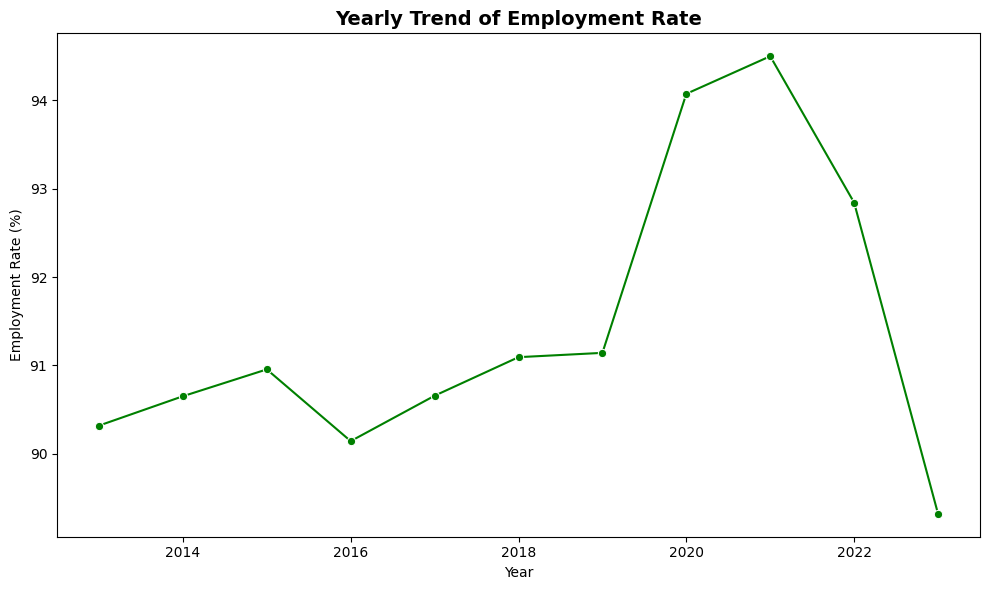

In [ ]:
yearly_emp = df.groupby("year")["employment_rate_overall"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="year", y="employment_rate_overall", data=yearly_emp, marker="o", color="green")
plt.title("Yearly Trend of Employment Rate", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Employment Rate (%)")
plt.tight_layout()
plt.show()


#  10 Scatter Plot – Median Salary vs Employment Rate by University

Purpose:
To explore the relationship between employment rate and median salary, with universities as color-coded categories.

Insights:

Shows whether higher employment rates correlate with higher salaries.

Helps pinpoint universities with balanced job placement and good pay.

Reveals any outliers — universities that have high pay but lower employment, or vice versa.

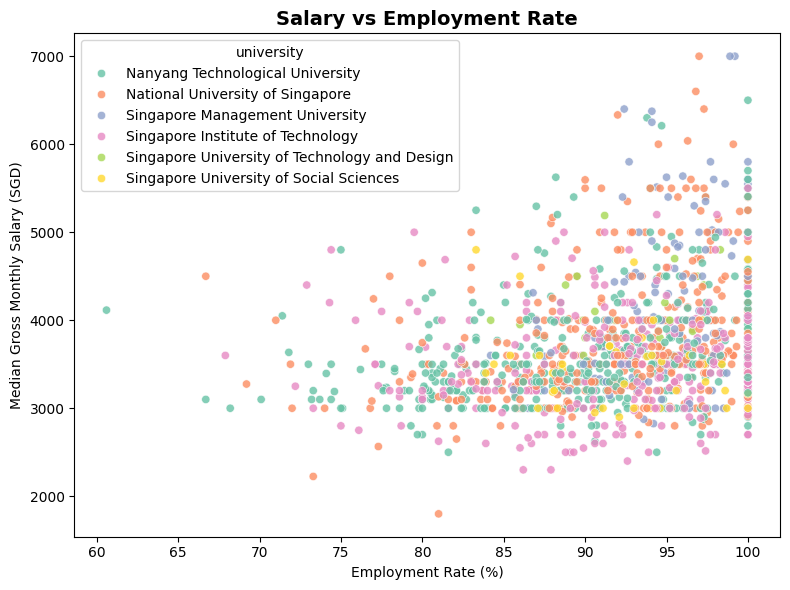

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="employment_rate_overall", y="gross_monthly_median", hue="university", data=df, palette="Set2", alpha=0.8)
plt.title("Salary vs Employment Rate", fontsize=14, fontweight='bold')
plt.xlabel("Employment Rate (%)")
plt.ylabel("Median Gross Monthly Salary (SGD)")
plt.tight_layout()
plt.show()


#  1️1️ Bubble Plot – Salary vs Employment Rate (Bubble = Median Salary)

Purpose:
To visualize three dimensions simultaneously — employment rate, mean salary, and median salary (as bubble size).

Insights:

Larger bubbles represent universities with higher median salaries.

Helps identify institutions that perform strongly in both employability and salary outcomes.

Excellent for spotting multi-factor balance between salary, employment, and reputation.

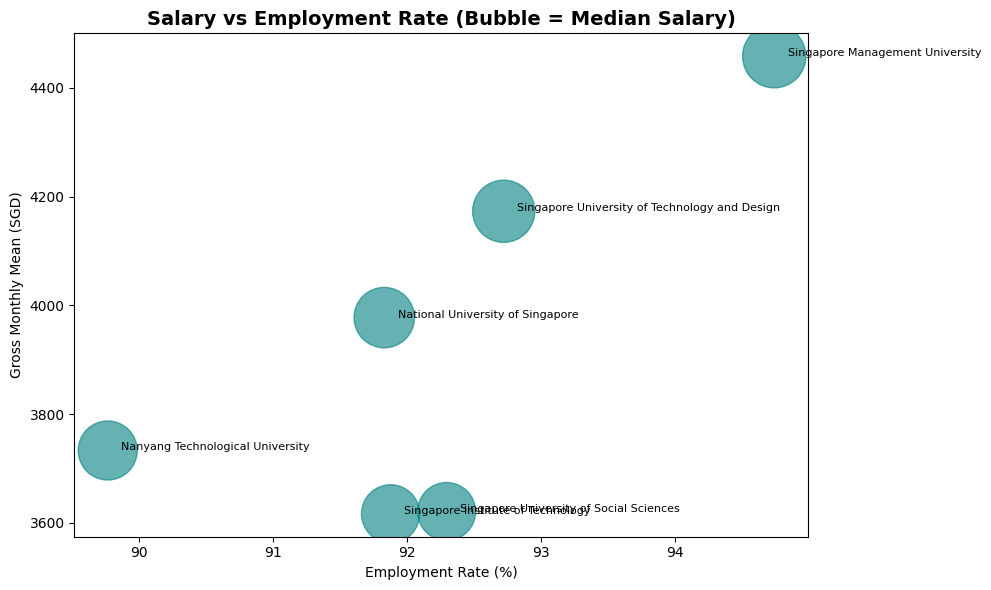

In [ ]:
plt.figure(figsize=(10,6))
bubble = df.groupby("university").agg({
    "gross_monthly_mean": "mean",
    "employment_rate_overall": "mean",
    "gross_monthly_median": "mean"
}).reset_index()

plt.scatter(bubble["employment_rate_overall"], bubble["gross_monthly_mean"],
            s=bubble["gross_monthly_median"]/2, alpha=0.6, color="teal")

for i, txt in enumerate(bubble["university"]):
    plt.text(bubble["employment_rate_overall"][i]+0.1, bubble["gross_monthly_mean"][i], txt, fontsize=8)

plt.title("Salary vs Employment Rate (Bubble = Median Salary)", fontsize=14, fontweight='bold')
plt.xlabel("Employment Rate (%)")
plt.ylabel("Gross Monthly Mean (SGD)")
plt.tight_layout()
plt.show()


#  12 Histogram – Distribution of Average Salaries

Purpose:
To understand how average gross monthly salaries are distributed across all graduates.

Insights:

Displays salary frequency — which salary ranges are most common.

The KDE curve reveals the overall salary trend (normal, skewed, or bimodal).

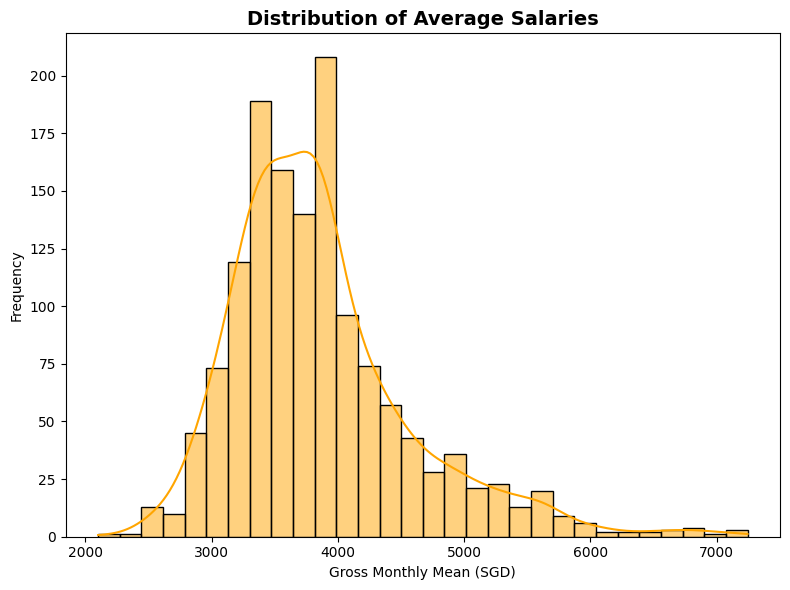

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df["gross_monthly_mean"], kde=True, bins=30, color="orange")
plt.title("Distribution of Average Salaries", fontsize=14, fontweight='bold')
plt.xlabel("Gross Monthly Mean (SGD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#  13️ Bar Plot – Top 10 Degrees by Median Gross Monthly Salary

Purpose:
To highlight the top-paying degree programs based on their median gross monthly salary.

Insights:

Reveals which degree specializations lead to higher salaries.

Useful for identifying in-demand or high-value programs.

Helps compare academic discipline performance in salary outcomes.

/tmp/ipython-input-2584444926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_degrees.values, y=top_degrees.index, palette="Blues_r")


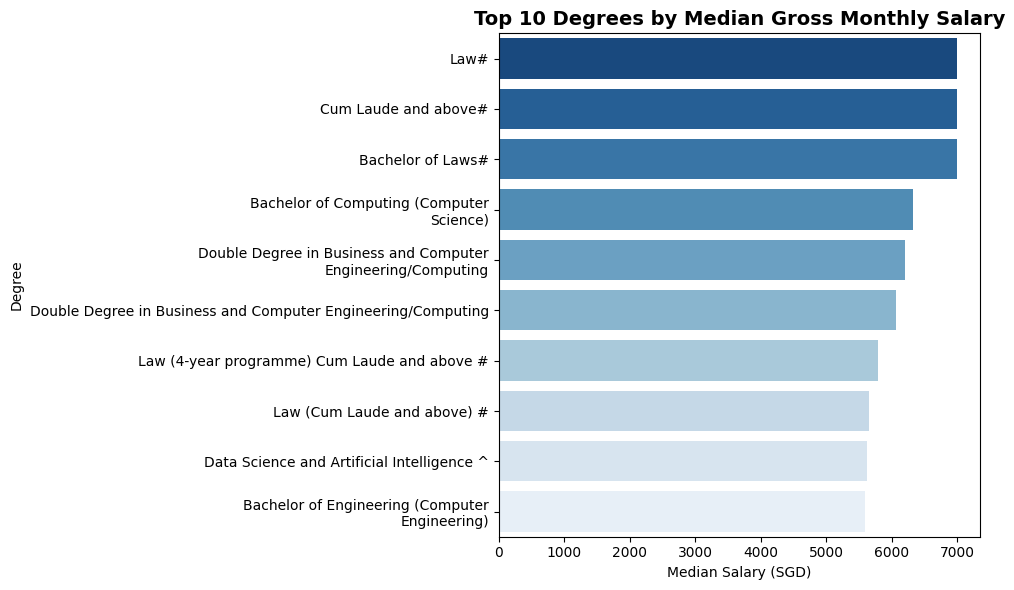

In [ ]:
top_degrees = df.groupby("degree")["gross_monthly_median"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_degrees.values, y=top_degrees.index, palette="Blues_r")
plt.title("Top 10 Degrees by Median Gross Monthly Salary", fontsize=14, fontweight='bold')
plt.xlabel("Median Salary (SGD)")
plt.ylabel("Degree")
plt.tight_layout()
plt.show()


#  14️ Violin Plot – Salary Distribution (Median) by University

Purpose:
To visualize the distribution and spread of median salaries for each university.

Insights:

Combines boxplot and KDE to show both salary range and density.

Wider sections indicate concentration of graduates at that salary level.

Helps identify universities with balanced vs skewed salary profiles.

/tmp/ipython-input-179607584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="university", y="gross_monthly_median", data=df, palette="Purples")


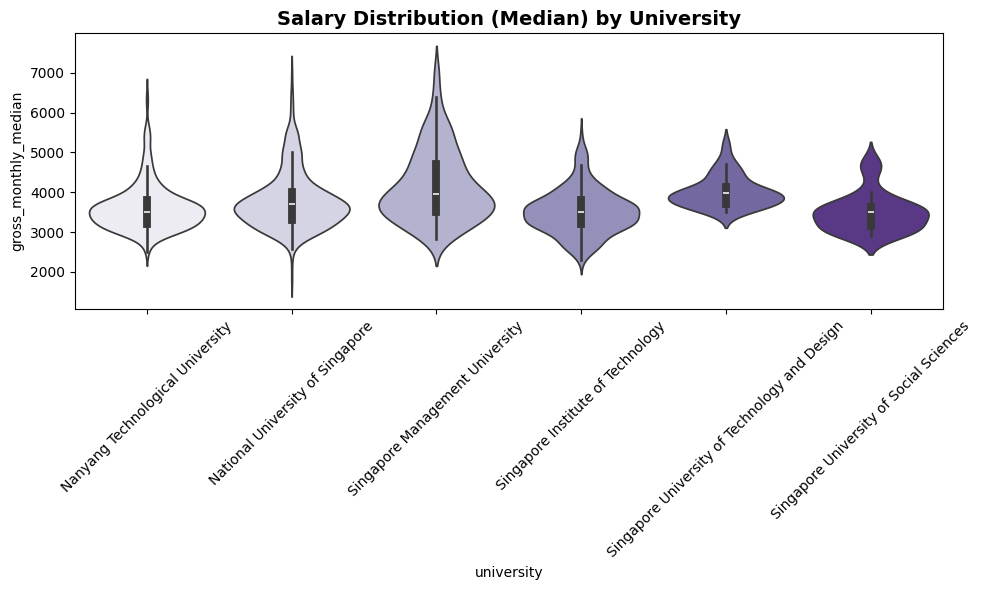

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x="university", y="gross_monthly_median", data=df, palette="Purples")
plt.title("Salary Distribution (Median) by University", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  15️ Pair Plot – Employment & Salary Variable Relationships

Purpose:
To explore pairwise relationships between employment and salary variables.

Insights:

Diagonal plots show individual variable distributions, while off-diagonal plots show relationships.

Reveals correlation patterns, such as whether higher employment rates align with better salaries.

Useful for identifying linear or nonlinear associations among metrics.

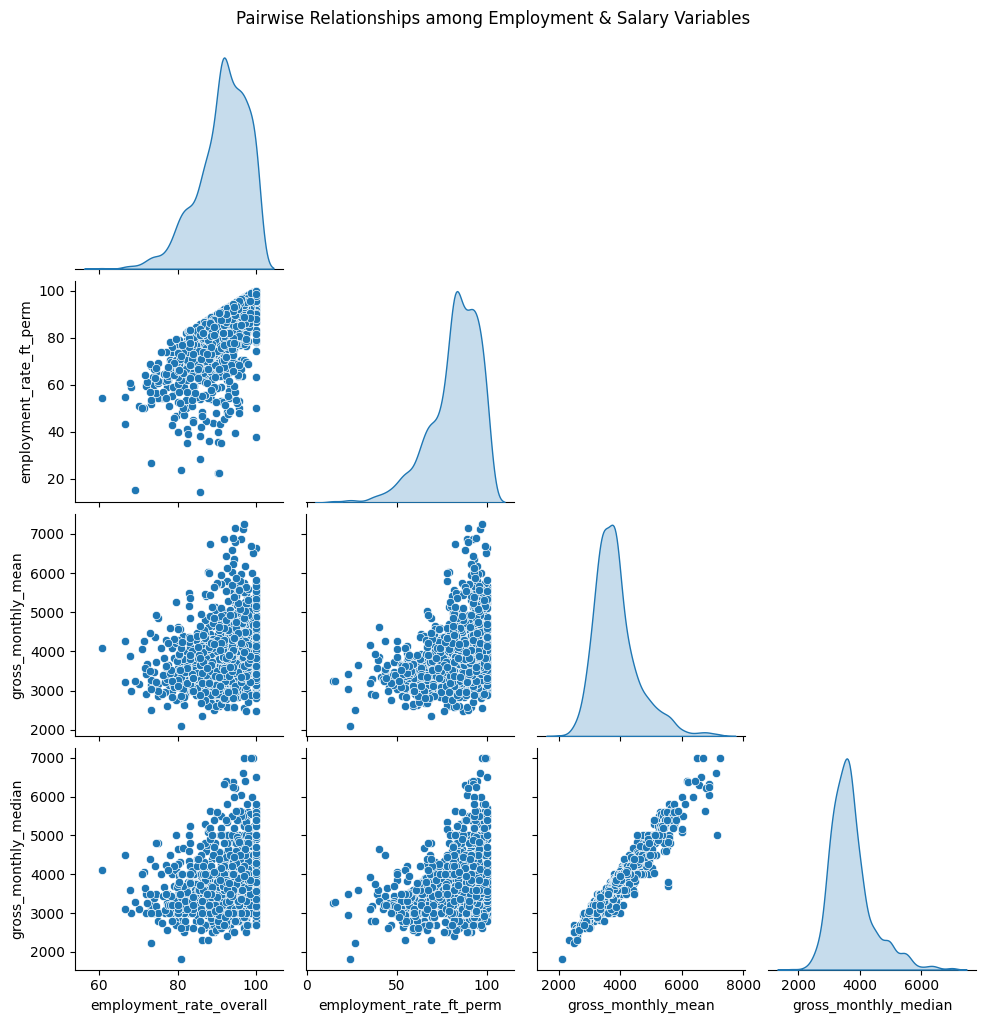

In [ ]:
sns.pairplot(df[["employment_rate_overall", "employment_rate_ft_perm", "gross_monthly_mean", "gross_monthly_median"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships among Employment & Salary Variables", y=1.02)
plt.show()


#  16️ Regression Plot – Overall vs Full-Time Employment Rate

Purpose:
To analyze the relationship between overall employment rate and full-time permanent employment rate.

Insights:

Regression line shows the strength and direction of correlation.

A strong positive trend indicates that overall employment increases with full-time employment.

Highlights outliers where temporary or part-time employment affects overall rates.

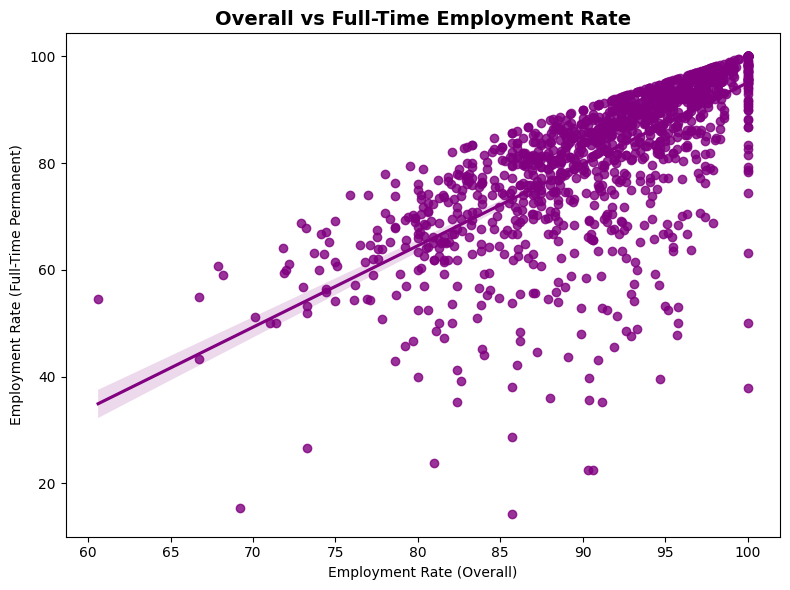

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x="employment_rate_overall", y="employment_rate_ft_perm", data=df, color="purple")
plt.title("Overall vs Full-Time Employment Rate", fontsize=14, fontweight='bold')
plt.xlabel("Employment Rate (Overall)")
plt.ylabel("Employment Rate (Full-Time Permanent)")
plt.tight_layout()
plt.show()


#  17️ 3D Scatter Plot – Employment Rate, Salary & Year

Purpose:
To visualize three variables together — employment rate, salary, and year — in 3D space.

Insights:

Demonstrates how employment and salary evolve together over time.

Color gradient (year) adds a temporal dimension, showing trends or clusters by year.

Helps detect multi-year patterns and relationships not visible in 2D charts.

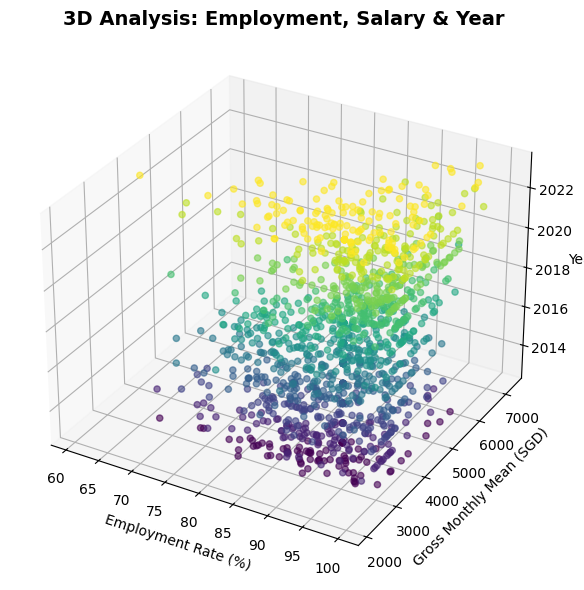

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["employment_rate_overall"], df["gross_monthly_mean"], df["year"], c=df["year"], cmap="viridis", alpha=0.6)
ax.set_xlabel("Employment Rate (%)")
ax.set_ylabel("Gross Monthly Mean (SGD)")
ax.set_zlabel("Year")
plt.title("3D Analysis: Employment, Salary & Year", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#  18️ Heatmap – Correlation Between Employment and Salary Metrics

Purpose:
To measure the statistical correlation strength between different employment and salary variables.

Insights:

Warm colors (red) indicate strong positive relationships, cool colors (blue) indicate negative or weak ones.

Shows which salary metrics are interrelated, and how employment rates align with them.

Helps identify redundant or highly dependent variables for further analysis or modeling.

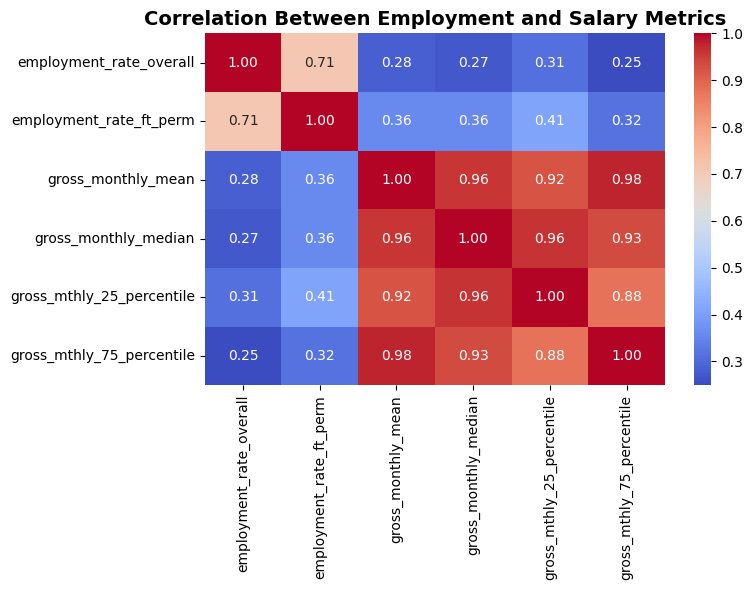

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
corr = df[["employment_rate_overall", "employment_rate_ft_perm",
           "gross_monthly_mean", "gross_monthly_median",
           "gross_mthly_25_percentile", "gross_mthly_75_percentile"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Employment and Salary Metrics", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Conclusion:

Analysis of graduate employment outcomes across Singaporean universities reveals a clear pattern — institutions like NUS, NTU, and SMU consistently achieve the highest employment rates and strong salary averages, reflecting strong industry alignment and reputation.

Over time, both salaries and employment rates show a steady upward trend, indicating a healthy graduate job market and growing demand for tertiary-educated professionals.

However, salary variations across degrees and faculties highlight that field of study plays a major role in determining earnings potential.

Overall, the dataset paints a positive picture of graduate employability in Singapore, with most universities maintaining strong outcomes in both employment and remuneration metrics.